<a href="https://colab.research.google.com/github/Ranjana05b/CreditRisk/blob/main/Ranjana_Credit_Risk_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1: Problem Statement  

Task-2: Data Exploration and Validation

Task-3: Data Cleaning

Task-4: Model Building Simple Models(Logistic Regregression and
Decision trees)

Task-5: Model Validation metrics calculation

Task-6: Handling Class imbalance(Rebuild Simple ML models)

Task-7: Feature Engineering

Task-8: Ensemble Methods - XGB and RF

Task-9: Model presentation

Task-10: Interview questions on the project




# Project Objective
## Background
## Goal, Number of Resources, Business Impact, Time Taken



**Background:**

Credit risk prediction plays a crucial role in the financial industry, helping banks and financial institutions assess the likelihood of a customer defaulting on credit payments. This project focuses on building a predictive model to identify the probability of clients defaulting based on various factors such as demographic information, payment history, and credit balance.


**Goal:**

The goal of this project is to develop a robust credit risk prediction model that can predict whether a client will default on their payment in the next month. The model will utilize various machine learning algorithms to analyze and predict outcomes based on historical data.

# DATA DICTIONARY

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=No)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Data Exploration and Validation


# Download from Github

Create a logionid on github
Upload your file on to github, then use the link here


https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [ ]:
import pandas as pd
credit_risk_data=pd.read_csv("https://raw.githubusercontent.com/datavedi1/my_datasets/main/credit_risk_data/UCI_Credit_Card.csv")
credit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Data Exploration

In [ ]:
credit_risk_data.shape

(30000, 25)

In [ ]:
credit_risk_data.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

## Discrete/Categorical Variables Exploration

In [ ]:
credit_risk_data.dtypes

,0
ID,int64
LIMIT_BAL,float64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


In [ ]:
pd.set_option('display.max_columns', None)
credit_risk_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [ ]:
filtered_data = credit_risk_data[['PAY_0', 'BILL_AMT1']][credit_risk_data['PAY_0'] == -2]
filtered_data

,PAY_0,BILL_AMT1
9,-2,0.0
23,-2,5512.0
33,-2,10929.0
34,-2,13709.0
45,-2,0.0
...,...,...
29946,-2,5419.0
29961,-2,0.0
29979,-2,0.0
29983,-2,1822.0


**Categorical Variables:**

**SEX** (Gender: 1=male, 2=female)

**EDUCATION** (Education level: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

**MARRIAGE** (Marital status: 1=married, 2=single, 3=others)

**default.payment.next.month**(Default payment status: 1=yes, 0=no)

**Discrete Variables:**

**PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6** (Repayment status: -1=pay duly, 1=payment delay for one month, etc.)

**Continuous Variables:**

**AGE** (Age in years)

**LIMIT_BAL** (Amount of given credit in NT dollars)

**BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6**(Bill statement amounts for different months in NT dollars)

**PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6** (Previous payment amounts for different months in NT dollars)

#Discrete and Categorical Variables

## Cat Var1 SEX

SEX
2    18112
1    11888
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='SEX'>

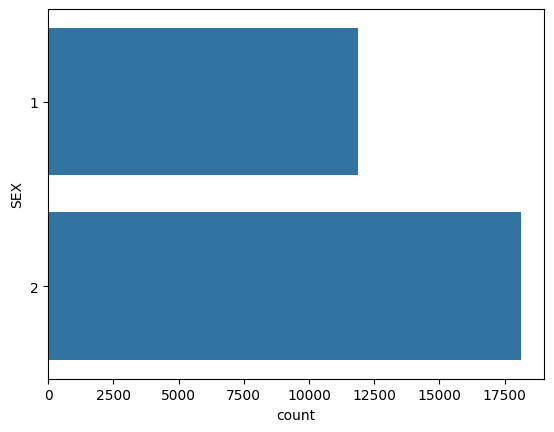

In [ ]:
print(credit_risk_data['SEX'].value_counts())
sns.countplot(y="SEX",  data=credit_risk_data)

## Cat Var 2 EDUCATION

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='EDUCATION'>

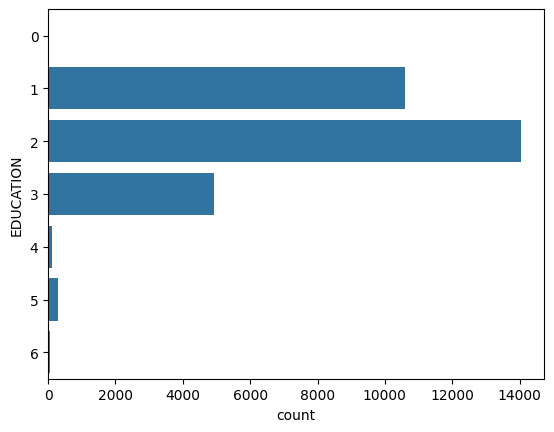

In [ ]:
print(credit_risk_data['EDUCATION'].value_counts())
sns.countplot(y="EDUCATION",  data=credit_risk_data)

Findings

## Cat Var 3 MARRIAGE

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='MARRIAGE'>

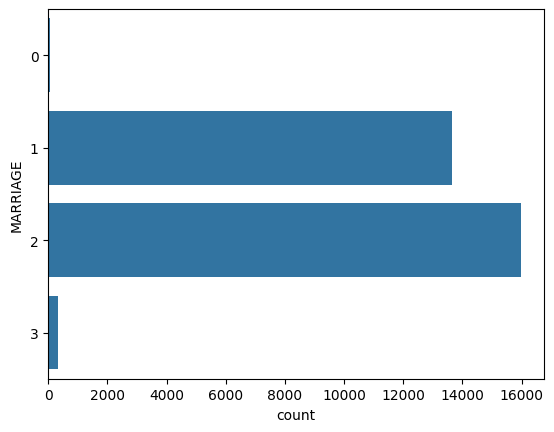

In [ ]:
print(credit_risk_data['MARRIAGE'].value_counts())
sns.countplot(y="MARRIAGE",  data=credit_risk_data)

## Disc Var4 PAY 0

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_0'>

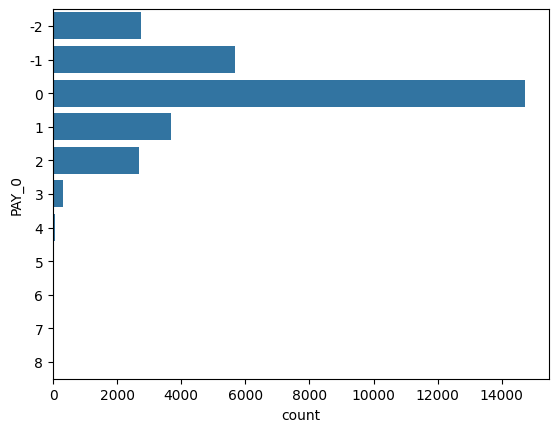

In [ ]:
print(credit_risk_data['PAY_0'].value_counts())
sns.countplot(y="PAY_0",  data=credit_risk_data)

## Disc Var 5 PAY 2

PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_2'>

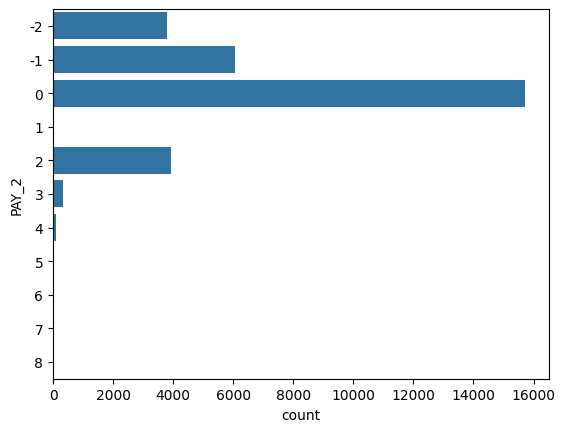

In [ ]:
print(credit_risk_data['PAY_2'].value_counts())
sns.countplot(y="PAY_2",  data=credit_risk_data)

Findings

## Disc Var 6 PAY 3

PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_3'>

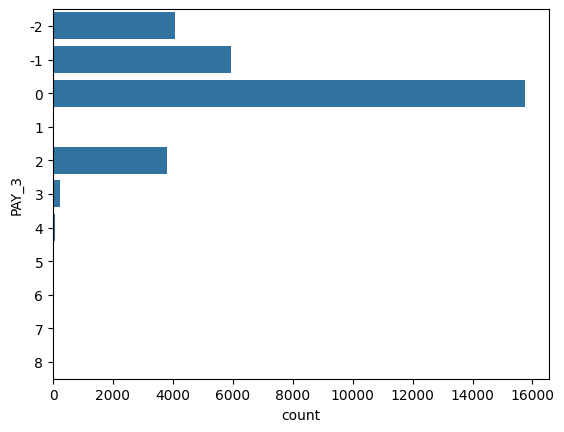

In [ ]:
print(credit_risk_data['PAY_3'].value_counts())
sns.countplot(y="PAY_3",  data=credit_risk_data)

## Disc Var 7 PAY 4

PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_4'>

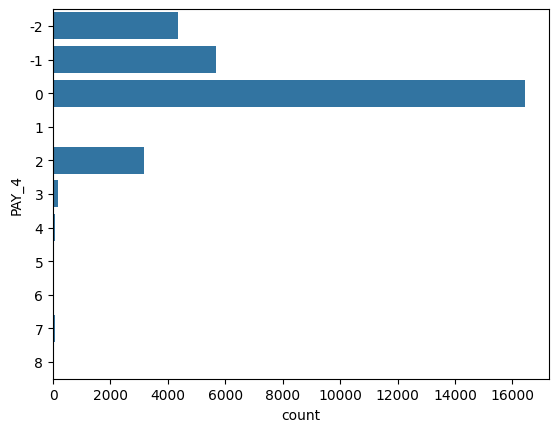

In [ ]:
print(credit_risk_data['PAY_4'].value_counts())
sns.countplot(y="PAY_4",  data=credit_risk_data)

## Disc Var 8 PAY 5

PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_5'>

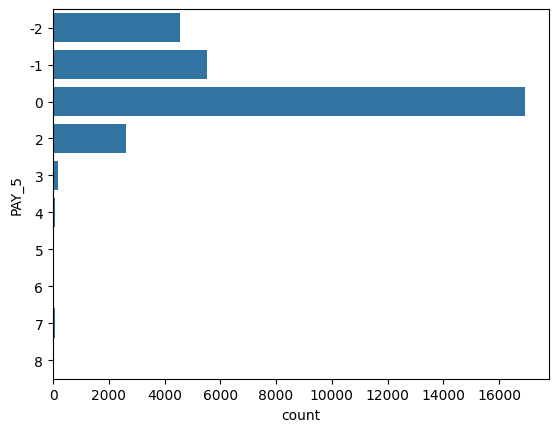

In [ ]:
print(credit_risk_data['PAY_5'].value_counts())
sns.countplot(y="PAY_5",  data=credit_risk_data)

## Disc Var 9 PAY 6

PAY_6
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_6'>

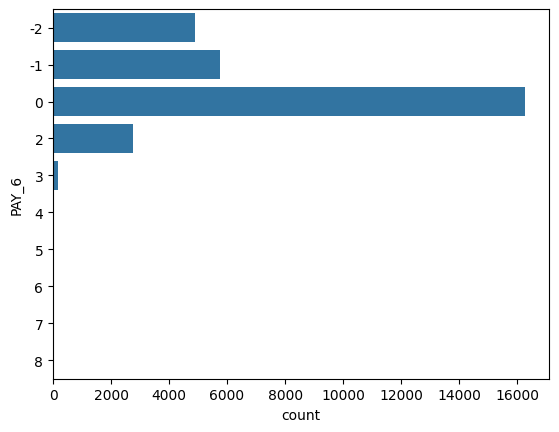

In [ ]:
print(credit_risk_data['PAY_6'].value_counts())
sns.countplot(y="PAY_6",  data=credit_risk_data)

## Cat Var 10 DEFAULT PAYMENT

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='default.payment.next.month'>

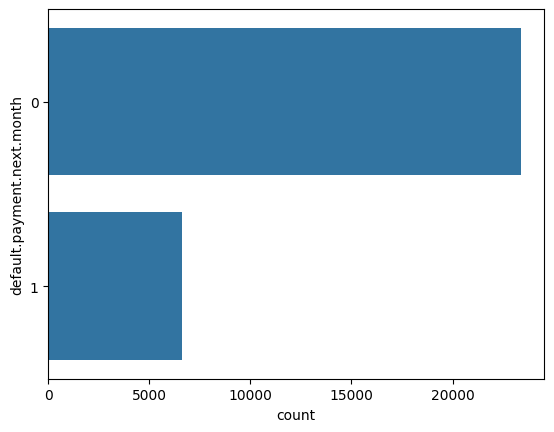

In [ ]:
print(credit_risk_data['default.payment.next.month'].value_counts())
sns.countplot(y="default.payment.next.month",  data=credit_risk_data)

## Continuous Variables Exploration

## Continuous Var1 AGE

In [ ]:
age_percentile = credit_risk_data['AGE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
age_percentile

,AGE
0.1,25.0
0.2,27.0
0.3,29.0
0.4,31.0
0.5,34.0
0.6,37.0
0.7,40.0
0.8,43.0
0.9,49.0
1.0,79.0


In [ ]:
age_percentile = credit_risk_data['AGE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
age_percentile

,AGE
0.10,25.0
0.20,27.0
0.30,29.0
0.40,31.0
0.50,34.0
0.60,37.0
0.70,40.0
0.80,43.0
0.90,49.0
0.91,49.0


## Continuous Var2 LIMIT BAL

In [ ]:
limit_percentile = credit_risk_data['LIMIT_BAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
limit_percentile
# plt.boxplot(credit_risk_data["LIMIT_BAL"])

,LIMIT_BAL
0.1,30000.0
0.2,50000.0
0.3,70000.0
0.4,100000.0
0.5,140000.0
0.6,180000.0
0.7,210000.0
0.8,270000.0
0.9,360000.0
1.0,1000000.0


In [ ]:
limit_percentile = credit_risk_data['LIMIT_BAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
limit_percentile

,LIMIT_BAL
0.10,30000.0
0.20,50000.0
0.30,70000.0
0.40,100000.0
0.50,140000.0
0.60,180000.0
0.70,210000.0
0.80,270000.0
0.90,360000.0
0.91,360000.0


## Continuous Var3 BILL AMT1

In [ ]:
bill_amt1_percentile = credit_risk_data['BILL_AMT1'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt1_percentile

,BILL_AMT1
0.1,278.9
0.2,1892.8
0.3,6050.4
0.4,13469.2
0.5,22381.5
0.6,37045.2
0.7,52204.9
0.8,83421.2
0.9,142133.7
1.0,964511.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7ea380738210>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea37ef96e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea37ef788d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea37f0156d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea37efe4b10>],
 'means': []}

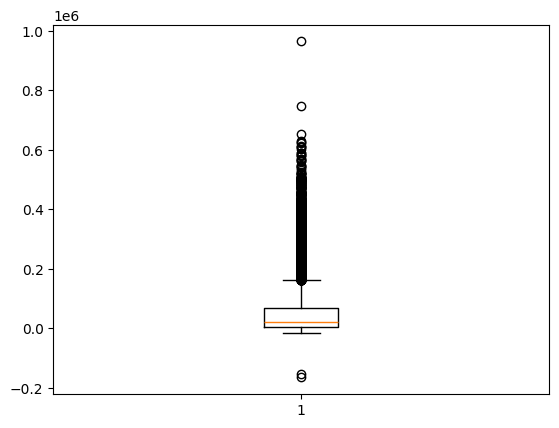

In [ ]:
plt.boxplot(credit_risk_data["BILL_AMT1"])

In [ ]:
bill_amt1_percentile = credit_risk_data['BILL_AMT1'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
bill_amt1_percentile

,BILL_AMT1
0.10,278.90
0.20,1892.80
0.30,6050.40
0.40,13469.20
0.50,22381.50
0.60,37045.20
0.70,52204.90
0.80,83421.20
0.90,142133.70
0.91,151214.72


Findings

## Continuous Var4 BILL AMT2

In [ ]:
bill_amt2_percentile = credit_risk_data['BILL_AMT2'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt2_percentile

,BILL_AMT2
0.1,0.0
0.2,1472.8
0.3,5500.0
0.4,12799.6
0.5,21200.0
0.6,34773.8
0.7,50690.0
0.8,80292.2
0.9,136905.5
1.0,983931.0


In [ ]:
bill_amt2_percentile = credit_risk_data['BILL_AMT2'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
bill_amt2_percentile

,BILL_AMT2
0.10,0.00
0.20,1472.80
0.30,5500.00
0.40,12799.60
0.50,21200.00
0.60,34773.80
0.70,50690.00
0.80,80292.20
0.90,136905.50
0.91,145064.86


## Continuous Var5 BILL AMT3

In [ ]:
bill_amt3_percentile = credit_risk_data['BILL_AMT3'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt3_percentile

,BILL_AMT3
0.1,0.0
0.2,1187.8
0.3,5219.2
0.4,12197.2
0.5,20088.5
0.6,31401.0
0.7,49217.3
0.8,76777.4
0.9,132051.3
1.0,1664089.0


In [ ]:
bill_amt3_percentile = credit_risk_data['BILL_AMT3'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
bill_amt3_percentile

,BILL_AMT3
0.90,132051.30
0.91,139419.08
0.92,148633.24
0.93,160049.77
0.94,173241.34
0.95,187821.05
0.96,203652.80
0.97,228277.79
0.98,263208.54
0.99,325030.39


#Continuous Var6 BILL AMT 4

In [ ]:
bill_amt4_percentile = credit_risk_data['BILL_AMT4'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt4_percentile

,BILL_AMT4
0.1,0.0
0.2,988.0
0.3,4643.7
0.4,11145.0
0.5,19052.0
0.6,28604.4
0.7,45456.6
0.8,70579.0
0.9,122418.7
1.0,891586.0


In [ ]:
bill_amt4_percentile = credit_risk_data['BILL_AMT4'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
bill_amt4_percentile

,BILL_AMT4
0.90,122418.70
0.91,130937.09
0.92,138646.80
0.93,148287.35
0.94,160944.12
0.95,174333.35
0.96,190088.52
0.97,210965.51
0.98,246655.72
0.99,304997.27


#Continuous Var7 BILL AMT5

In [ ]:
bill_amt5_percentile = credit_risk_data['BILL_AMT5'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt5_percentile

,BILL_AMT5
0.1,0.0
0.2,763.0
0.3,3637.0
0.4,9809.2
0.5,18104.5
0.6,26690.4
0.7,40943.2
0.8,65823.0
0.9,115883.0
1.0,927171.0


In [ ]:
bill_amt5_percentile = credit_risk_data['BILL_AMT5'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
bill_amt5_percentile

,BILL_AMT5
0.90,115883.00
0.91,123655.36
0.92,132233.96
0.93,141291.49
0.94,151270.38
0.95,165794.30
0.96,181044.44
0.97,198861.03
0.98,228587.04
0.99,285868.33


Findings

#Continuous Var8 BILL AMT6

In [ ]:
bill_amt6_percentile = credit_risk_data['BILL_AMT6'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
bill_amt6_percentile

,BILL_AMT6
0.1,0.0
0.2,476.0
0.3,2701.7
0.4,8770.2
0.5,17071.0
0.6,25508.4
0.7,39252.2
0.8,63150.6
0.9,112110.4
1.0,961664.0


In [ ]:
bill_amt6_percentile = credit_risk_data['BILL_AMT6'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
bill_amt6_percentile

,BILL_AMT6
0.90,112110.40
0.91,120740.53
0.92,129224.48
0.93,137836.47
0.94,148093.84
0.95,161912.00
0.96,177592.76
0.97,195114.30
0.98,223436.14
0.99,279505.06


## Continuous Var9 PAY AMT1

In [ ]:
pay_amt1_percentile = credit_risk_data['PAY_AMT1'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt1_percentile

,PAY_AMT1
0.1,0.0
0.2,316.0
0.3,1263.7
0.4,1724.0
0.5,2100.0
0.6,3000.0
0.7,4309.3
0.8,6192.2
0.9,10300.0
1.0,873552.0


In [ ]:
pay_amt1_percentile = credit_risk_data['PAY_AMT1'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt1_percentile

,PAY_AMT1
0.90,10300.00
0.91,11174.00
0.92,12500.00
0.93,14127.07
0.94,15510.66
0.95,18428.20
0.96,21006.24
0.97,28232.78
0.98,40000.00
0.99,66522.18


{'whiskers': [<matplotlib.lines.Line2D at 0x7ea37b8029d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea37e33bdd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea37efe5290>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea37bbb6e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea37bbb63d0>],
 'means': []}

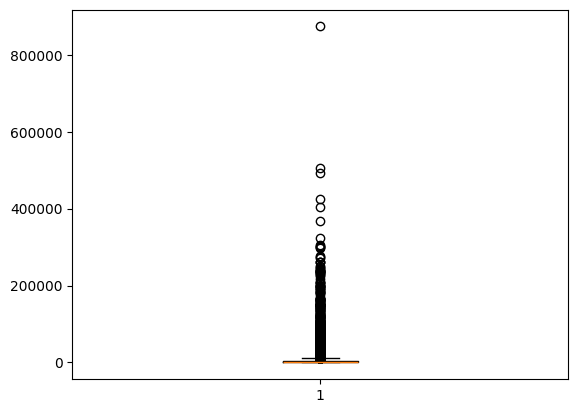

In [ ]:
plt.boxplot(credit_risk_data["PAY_AMT1"])

## Continuous Var10 PAY AMT2

In [ ]:
pay_amt2_percentile = credit_risk_data['PAY_AMT2'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt2_percentile

,PAY_AMT2
0.1,0.0
0.2,268.8
0.3,1165.0
0.4,1600.0
0.5,2009.0
0.6,3000.0
0.7,4045.3
0.8,6000.0
0.9,10401.1
1.0,1684259.0


In [ ]:
pay_amt2_percentile = credit_risk_data['PAY_AMT2'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt2_percentile

,PAY_AMT2
0.90,10401.10
0.91,11320.00
0.92,12536.16
0.93,14131.26
0.94,16000.00
0.95,19004.35
0.96,21408.36
0.97,29000.00
0.98,41027.88
0.99,76651.02


## Continuous Var11 PAY AMT3

In [ ]:
pay_amt3_percentile = credit_risk_data['PAY_AMT3'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt3_percentile

,PAY_AMT3
0.1,0.0
0.2,2.8
0.3,780.0
0.4,1206.0
0.5,1800.0
0.6,2500.0
0.7,3560.3
0.8,5284.0
0.9,10000.0
1.0,896040.0


In [ ]:
pay_amt3_percentile = credit_risk_data['PAY_AMT3'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt3_percentile

,PAY_AMT3
0.90,10000.00
0.91,10288.36
0.92,11558.48
0.93,13000.00
0.94,15000.00
0.95,17589.40
0.96,20150.00
0.97,27000.33
0.98,38661.36
0.99,70000.00


## Continuous Var12 PAY_AMT4

In [ ]:
pay_amt4_percentile = credit_risk_data['PAY_AMT4'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt4_percentile

,PAY_AMT4
0.1,0.0
0.2,0.0
0.3,500.0
0.4,1000.0
0.5,1500.0
0.6,2100.0
0.7,3200.0
0.8,5000.0
0.9,9570.6
1.0,621000.0


In [ ]:
pay_amt4_percentile = credit_risk_data['PAY_AMT4'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt4_percentile

,PAY_AMT4
0.90,9570.60
0.91,10000.00
0.92,10404.72
0.93,11985.21
0.94,13949.60
0.95,16014.95
0.96,20000.00
0.97,26665.40
0.98,39634.04
0.99,67054.44


## Continuous Var13 PAY AMT5

In [ ]:
pay_amt5_percentile = credit_risk_data['PAY_AMT5'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt5_percentile

,PAY_AMT5
0.1,0.0
0.2,0.0
0.3,500.0
0.4,1000.0
0.5,1500.0
0.6,2123.4
0.7,3200.0
0.8,5000.0
0.9,9500.0
1.0,426529.0


In [ ]:
pay_amt5_percentile = credit_risk_data['PAY_AMT5'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt5_percentile

,PAY_AMT5
0.90,9500.00
0.91,10000.00
0.92,10358.16
0.93,11964.14
0.94,13939.06
0.95,16000.00
0.96,20000.00
0.97,25314.21
0.98,37259.66
0.99,65607.56


## Continuous Var14 PAY AMT6

In [ ]:
pay_amt6_percentile = credit_risk_data['PAY_AMT6'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
pay_amt6_percentile

,PAY_AMT6
0.1,0.0
0.2,0.0
0.3,426.0
0.4,1000.0
0.5,1500.0
0.6,2100.0
0.7,3200.0
0.8,5000.0
0.9,9600.0
1.0,528666.0


In [ ]:
pay_amt6_percentile = credit_risk_data['PAY_AMT6'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
pay_amt6_percentile

,PAY_AMT6
0.90,9600.00
0.91,10000.00
0.92,10500.00
0.93,12017.14
0.94,14442.86
0.95,17343.80
0.96,21034.88
0.97,29561.76
0.98,45010.48
0.99,82619.05


#Findings

**Categorical Variables:**

**SEX and default.payment.next.month** are clean and don't require any modifications. The data is consistent with the predefined categories (1 = male, 2 = female for SEX and 0 = No, 1 = Yes for default).

**EDUCATION** contained an outlier value "0" which was replaced with "6" (unknown).

**MARRIAGE** had an outlier value "0", which was replaced with "3" (others).

**PAY variables (PAY_0 to PAY_6)** had outliers with "0" and "-2" values, which were replaced with the nearest valid values for consistency.


**Continuous Variables:**

**AGE** had values greater than 60, which were replaced with the median value of the age column to handle outliers.

**LIMIT_BAL** had extreme values above 500,000, which were replaced with the median to remove outliers.

**BILL_AMT1 to BILL_AMT6 and PAY_AMT1 to PAY_AMT6** contained extreme outliers between the 99th and 100th percentiles, which were replaced with their respective median values to maintain consistency in the data.

**Data Transformation:**

**Categorical variables** were cleaned through imputation and replacement of outliers.

**Continuous variables** were adjusted for outliers using median imputation to ensure that extreme values do not distort the analysis.

# Data Cleaning and Data Preparation

#Cat Var1 Cleaning EDUCATION

In [ ]:
freq_table_education=credit_risk_data['EDUCATION'].value_counts()
freq_table_education

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


In [ ]:
#Cross tab with target
import pandas as pd
cross_tab_eductaion_target=pd.crosstab(credit_risk_data['EDUCATION'],credit_risk_data['default.payment.next.month'])
cross_tab_eductaion_target

default.payment.next.month,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [ ]:
credit_risk_data['EDUCATION_NEW']=credit_risk_data['EDUCATION']
credit_risk_data['EDUCATION_NEW'][credit_risk_data['EDUCATION']==0]=6
credit_risk_data['EDUCATION_NEW']

credit_risk_data['EDUCATION_NEW'].value_counts()

<ipython-input-51-9e54792918a8>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['EDUCATION_NEW'][credit_risk_data['EDUCATION']==0]=6
<ipython-input-51-9e54792918a8>:2: SettingWithCopyWarning: 
A value is trying to be set on

,count
EDUCATION_NEW,
2,14030
1,10585
3,4917
5,280
4,123
6,65


#Cat Var2 Cleaning MARRIAGE

In [ ]:
freq_table_marriage=credit_risk_data['MARRIAGE'].value_counts()
freq_table_marriage

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


In [ ]:
credit_risk_data['MARRIAGE_NEW']=credit_risk_data['MARRIAGE']
credit_risk_data['MARRIAGE_NEW'][credit_risk_data['MARRIAGE']==0]=3
credit_risk_data['MARRIAGE_NEW']
credit_risk_data['MARRIAGE_NEW'].value_counts()

<ipython-input-53-426cc1d2f372>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['MARRIAGE_NEW'][credit_risk_data['MARRIAGE']==0]=3
<ipython-input-53-426cc1d2f372>:2: SettingWithCopyWarning: 
A value is trying to be set on a

,count
MARRIAGE_NEW,
2,15964
1,13659
3,377


#Cat Var3 Cleaning PAY 0

In [ ]:
freq_table_pay_0=credit_risk_data['PAY_0'].value_counts()
freq_table_pay_0

,count
PAY_0,
0,14737
-1,5686
1,3688
-2,2759
2,2667
3,322
4,76
5,26
8,19


In [ ]:
credit_risk_data['PAY_0_NEW']=credit_risk_data['PAY_0']
credit_risk_data['PAY_0_NEW'][credit_risk_data['PAY_0']==0]= -1
credit_risk_data['PAY_0_NEW'][credit_risk_data['PAY_0']==-2]= 2
credit_risk_data['PAY_0_NEW'].value_counts()

<ipython-input-55-447ade95f17d>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_0_NEW'][credit_risk_data['PAY_0']==0]= -1
<ipython-input-55-447ade95f17d>:2: SettingWithCopyWarning: 
A value is trying to be set on a cop

,count
PAY_0_NEW,
-1,20423
2,5426
1,3688
3,322
4,76
5,26
8,19
6,11
7,9


#Cat Var4 Cleaning PAY 2

In [ ]:
freq_table_pay_2=credit_risk_data['PAY_2'].value_counts()
freq_table_pay_2

,count
PAY_2,
0,15730
-1,6050
2,3927
-2,3782
3,326
4,99
1,28
5,25
7,20


In [ ]:
credit_risk_data['PAY_2_NEW']=credit_risk_data['PAY_2']
credit_risk_data['PAY_2_NEW'][credit_risk_data['PAY_2']==0]= -1
credit_risk_data['PAY_2_NEW'][credit_risk_data['PAY_2']==-2]= 2
credit_risk_data['PAY_2_NEW'].value_counts()

<ipython-input-57-49d8a8858408>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_2_NEW'][credit_risk_data['PAY_2']==0]= -1
<ipython-input-57-49d8a8858408>:2: SettingWithCopyWarning: 
A value is trying to be set on a cop

,count
PAY_2_NEW,
-1,21780
2,7709
3,326
4,99
1,28
5,25
7,20
6,12
8,1


#Cat Var5 Cleaning PAY 3

In [ ]:
freq_table_pay_3=credit_risk_data['PAY_3'].value_counts()
freq_table_pay_3

,count
PAY_3,
0,15764
-1,5938
-2,4085
2,3819
3,240
4,76
7,27
6,23
5,21


In [ ]:
credit_risk_data['PAY_3_NEW']=credit_risk_data['PAY_3']
credit_risk_data['PAY_3_NEW'][credit_risk_data['PAY_3']==0]= -1
credit_risk_data['PAY_3_NEW'][credit_risk_data['PAY_3']==-2]= 2
credit_risk_data['PAY_3_NEW'].value_counts()

<ipython-input-59-4e7c63f46130>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_3_NEW'][credit_risk_data['PAY_3']==0]= -1
<ipython-input-59-4e7c63f46130>:2: SettingWithCopyWarning: 
A value is trying to be set on a cop

,count
PAY_3_NEW,
-1,21702
2,7904
3,240
4,76
7,27
6,23
5,21
1,4
8,3


#Cat Var6 Cleaning PAY 4

In [ ]:
freq_table_pay_4=credit_risk_data['PAY_4'].value_counts()
freq_table_pay_4

,count
PAY_4,
0,16455
-1,5687
-2,4348
2,3159
3,180
4,69
7,58
5,35
6,5


In [ ]:
credit_risk_data['PAY_4_NEW']=credit_risk_data['PAY_4']
credit_risk_data['PAY_4_NEW'][credit_risk_data['PAY_4']==0]= -1
credit_risk_data['PAY_4_NEW'][credit_risk_data['PAY_4']==-2]= 2
credit_risk_data['PAY_4_NEW'].value_counts()

<ipython-input-61-77156255c490>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_4_NEW'][credit_risk_data['PAY_4']==0]= -1
<ipython-input-61-77156255c490>:2: SettingWithCopyWarning: 
A value is trying to be set on a cop

,count
PAY_4_NEW,
-1,22142
2,7507
3,180
4,69
7,58
5,35
6,5
1,2
8,2


#Cat Var7 Cleaning PAY 5

In [ ]:
freq_table_pay_5=credit_risk_data['PAY_5'].value_counts()
freq_table_pay_5

,count
PAY_5,
0,16947
-1,5539
-2,4546
2,2626
3,178
4,84
7,58
5,17
6,4


In [ ]:
credit_risk_data['PAY_5_NEW']=credit_risk_data['PAY_5']
credit_risk_data['PAY_5_NEW'][credit_risk_data['PAY_5']==0]= -1
credit_risk_data['PAY_5_NEW'][credit_risk_data['PAY_5']==-2]= 2
credit_risk_data['PAY_5_NEW'].value_counts()

<ipython-input-63-9723f3433195>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_5_NEW'][credit_risk_data['PAY_5']==0]= -1
<ipython-input-63-9723f3433195>:2: SettingWithCopyWarning: 
A value is trying to be set on a cop

,count
PAY_5_NEW,
-1,22486
2,7172
3,178
4,84
7,58
5,17
6,4
8,1


#Cat Var7 Cleaning PAY 6

In [ ]:
freq_table_pay_6=credit_risk_data['PAY_6'].value_counts()
freq_table_pay_6

,count
PAY_6,
0,16286
-1,5740
-2,4895
2,2766
3,184
4,49
7,46
6,19
5,13


In [ ]:
credit_risk_data['PAY_6_NEW']=credit_risk_data['PAY_6']
credit_risk_data['PAY_6_NEW'][credit_risk_data['PAY_6']==0]= -1
credit_risk_data['PAY_6_NEW'][credit_risk_data['PAY_6']==-2]= -1
credit_risk_data['PAY_6_NEW'].value_counts()

<ipython-input-65-3e3f859dbc4c>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_6_NEW'][credit_risk_data['PAY_6']==0]= -1
<ipython-input-65-3e3f859dbc4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a cop

,count
PAY_6_NEW,
-1,26921
2,2766
3,184
4,49
7,46
6,19
5,13
8,2


#Continuos variable cleaning

## Var1 Limit Bal Cleaning

In [ ]:
median_limit_bal=credit_risk_data['LIMIT_BAL'].median()
median_limit_bal

140000.0

In [ ]:
limit_temp_bool_vect=credit_risk_data['LIMIT_BAL']>500000.0

credit_risk_data['LIMIT_BAL_NEW']=credit_risk_data['LIMIT_BAL']
credit_risk_data['LIMIT_BAL_NEW'][limit_temp_bool_vect]=median_limit_bal

<ipython-input-67-f8b3bee473f5>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['LIMIT_BAL_NEW'][limit_temp_bool_vect]=median_limit_bal
<ipython-input-67-f8b3bee473f5>:4: SettingWithCopyWarning: 
A value is trying to be set

In [ ]:
# percentile distribution for new variable
limit_bal_percentiles1=credit_risk_data['LIMIT_BAL_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(limit_bal_percentiles1,2)


,LIMIT_BAL_NEW
0.10,30000.0
0.20,50000.0
0.30,70000.0
0.40,100000.0
0.50,140000.0
0.60,180000.0
0.70,210000.0
0.80,260000.0
0.90,360000.0
0.91,360000.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7ea37e31f210>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea37e218750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea37e31e990>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea37e219a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea37e21a390>],
 'means': []}

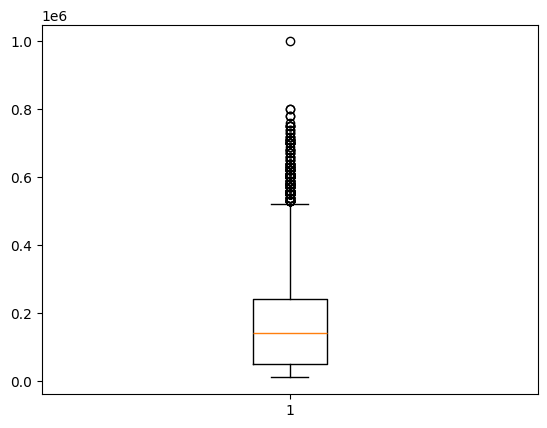

In [ ]:
plt.boxplot(credit_risk_data["LIMIT_BAL"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea37e3e4f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea37e5fd510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea37e3e5890>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea37e5fec90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea37e5fe410>],
 'means': []}

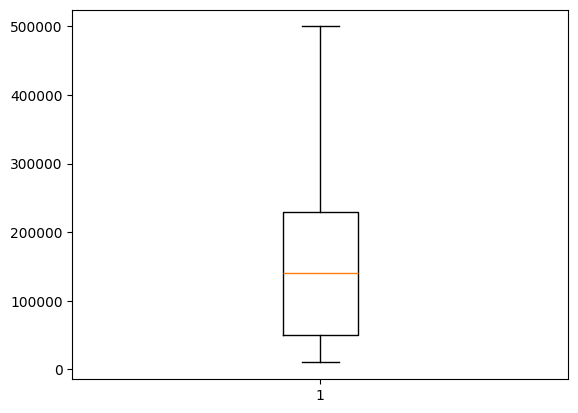

In [ ]:
plt.boxplot(credit_risk_data["LIMIT_BAL_NEW"])

## Var2 Bill Amt1 Cleaning

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea37ed5b3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea37ed5a010>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea37ed5bc50>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea37ed589d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea37ece0290>],
 'means': []}

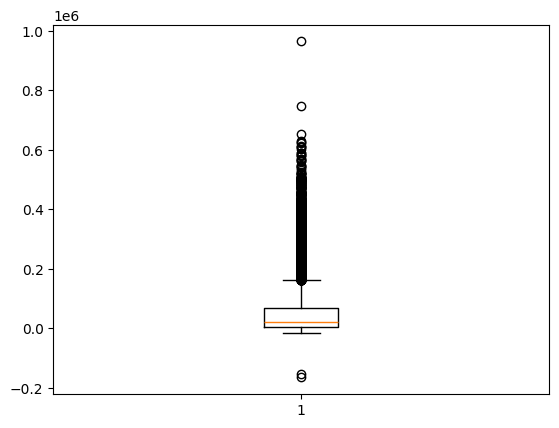

In [ ]:
plt.boxplot(credit_risk_data["BILL_AMT1"])

In [ ]:
median_bill_amt1=credit_risk_data['BILL_AMT1'].median()
median_bill_amt1

22381.5

In [ ]:
bill_amt1_temp_bool_vect=credit_risk_data['BILL_AMT1']>350110.68

credit_risk_data['BILL_AMT1_NEW']=credit_risk_data['BILL_AMT1']
credit_risk_data['BILL_AMT1_NEW'][bill_amt1_temp_bool_vect]=median_bill_amt1

<ipython-input-73-bfcc58142562>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['BILL_AMT1_NEW'][bill_amt1_temp_bool_vect]=median_bill_amt1
<ipython-input-73-bfcc58142562>:4: SettingWithCopyWarning: 
A value is trying to be

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea37e97c610>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea37e97ddd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea37e960ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea37e97f410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea37e97ff90>],
 'means': []}

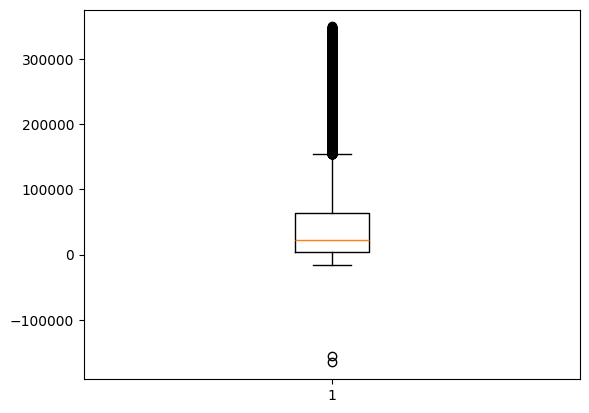

In [ ]:
plt.boxplot(credit_risk_data["BILL_AMT1_NEW"])

## Var3 Bill Amt2 Cleaning

In [ ]:
bill_amt2_temp_bool_vect=credit_risk_data['BILL_AMT2']>337495.28

credit_risk_data['BILL_AMT2_NEW']=credit_risk_data['BILL_AMT2']
credit_risk_data['BILL_AMT2_NEW'][bill_amt2_temp_bool_vect]=credit_risk_data['BILL_AMT2'].median()

<ipython-input-75-1ea9f8174fec>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['BILL_AMT2_NEW'][bill_amt2_temp_bool_vect]=credit_risk_data['BILL_AMT2'].median()
<ipython-input-75-1ea9f8174fec>:4: SettingWithCopyWarning: 
A

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea37e779d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea37e7785d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea37e77a950>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea37e6bd110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea37e6bdb90>],
 'means': []}

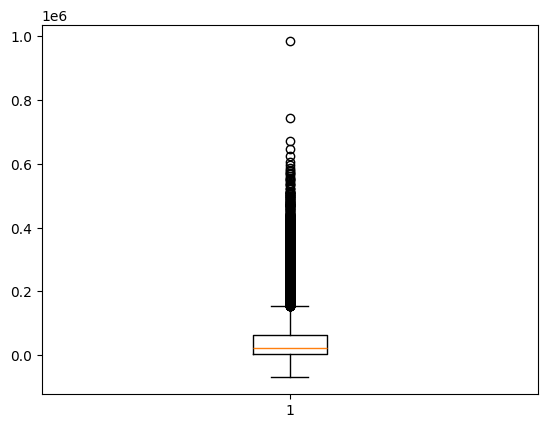

In [ ]:
plt.boxplot(credit_risk_data["BILL_AMT2"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea37e1c6210>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea37e1c7910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea37e1c5650>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea37e1cd110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea37e1cdb50>],
 'means': []}

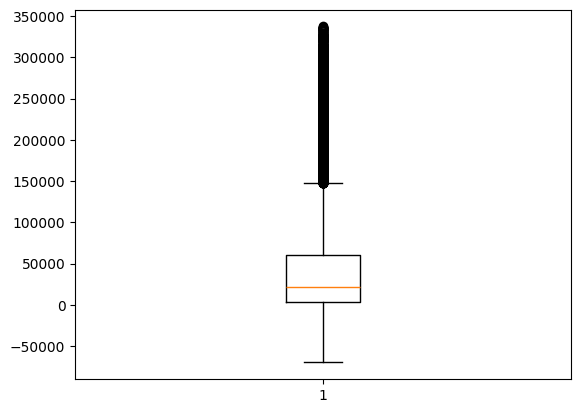

In [ ]:
plt.boxplot(credit_risk_data["BILL_AMT2_NEW"])

In [ ]:
# percentile distribution for new variable
bill_amt2_percentiles1=credit_risk_data['BILL_AMT2_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(bill_amt2_percentiles1,2)

,BILL_AMT2_NEW
0.10,0.00
0.20,1472.80
0.30,5500.00
0.40,12799.60
0.50,21198.50
0.60,32802.40
0.70,49664.30
0.80,77361.40
0.90,130283.90
0.91,136905.05


## Var4 Bill Amt3 Cleaning

In [ ]:
bill_amt3_temp_bool_vect=credit_risk_data['BILL_AMT3']>325030.39

credit_risk_data['BILL_AMT3_NEW']=credit_risk_data['BILL_AMT3']
credit_risk_data['BILL_AMT3_NEW'][bill_amt3_temp_bool_vect]=credit_risk_data['BILL_AMT3'].median()

<ipython-input-79-38a55d547dcc>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['BILL_AMT3_NEW'][bill_amt3_temp_bool_vect]=credit_risk_data['BILL_AMT3'].median()
<ipython-input-79-38a55d547dcc>:4: SettingWithCopyWarning: 
A

In [ ]:
# percentile distribution for new variable
bill_amt3_percentiles1=credit_risk_data['BILL_AMT3_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(bill_amt3_percentiles1,2)

,BILL_AMT3_NEW
0.10,0.00
0.20,1187.80
0.30,5219.20
0.40,12197.20
0.50,20088.25
0.60,30128.00
0.70,48167.80
0.80,73069.80
0.90,124691.50
0.91,132051.27


## Var5 Bill Amt4 Cleaning

In [ ]:
bill_amt4_temp_bool_vect=credit_risk_data['BILL_AMT4']>304997.27

credit_risk_data['BILL_AMT4_NEW']=credit_risk_data['BILL_AMT4']
credit_risk_data['BILL_AMT4_NEW'][bill_amt4_temp_bool_vect]=credit_risk_data['BILL_AMT4'].median()

<ipython-input-81-0a5b04513260>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['BILL_AMT4_NEW'][bill_amt4_temp_bool_vect]=credit_risk_data['BILL_AMT4'].median()
<ipython-input-81-0a5b04513260>:4: SettingWithCopyWarning: 
A

In [ ]:
# percentile distribution for new variable
bill_amt4_percentiles1=credit_risk_data['BILL_AMT4_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(bill_amt4_percentiles1,2)

,BILL_AMT4_NEW
0.10,0.00
0.20,988.00
0.30,4643.70
0.40,11145.00
0.50,19052.00
0.60,27850.00
0.70,43514.20
0.80,67501.20
0.90,115045.10
0.91,122418.43


## Var6 Bill Amt5 Cleaning

In [ ]:
bill_amt5_temp_bool_vect=credit_risk_data['BILL_AMT5']>285868.33

credit_risk_data['BILL_AMT5_NEW']=credit_risk_data['BILL_AMT5']
credit_risk_data['BILL_AMT5_NEW'][bill_amt5_temp_bool_vect]=credit_risk_data['BILL_AMT5'].median()

<ipython-input-83-e90b61ae7f2a>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['BILL_AMT5_NEW'][bill_amt5_temp_bool_vect]=credit_risk_data['BILL_AMT5'].median()
<ipython-input-83-e90b61ae7f2a>:4: SettingWithCopyWarning: 
A

In [ ]:
# percentile distribution for new variable
bill_amt5_percentiles1=credit_risk_data['BILL_AMT5_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(bill_amt5_percentiles1,2)

,BILL_AMT5_NEW
0.10,0.00
0.20,763.00
0.30,3637.00
0.40,9809.20
0.50,18104.25
0.60,25635.20
0.70,38900.90
0.80,61746.40
0.90,108074.90
0.91,115882.90


## Var7 Bill Amt6 Cleaning

In [ ]:
bill_amt6_temp_bool_vect=credit_risk_data['BILL_AMT6']>279505.06


credit_risk_data['BILL_AMT6_NEW']=credit_risk_data['BILL_AMT6']
credit_risk_data['BILL_AMT6_NEW'][bill_amt6_temp_bool_vect]=credit_risk_data['BILL_AMT6'].median()

<ipython-input-85-90a3098beb86>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['BILL_AMT6_NEW'][bill_amt6_temp_bool_vect]=credit_risk_data['BILL_AMT6'].median()
<ipython-input-85-90a3098beb86>:5: SettingWithCopyWarning: 
A

In [ ]:
# percentile distribution for new variable
bill_amt6_percentiles1=credit_risk_data['BILL_AMT6_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(bill_amt6_percentiles1,2)

,BILL_AMT6_NEW
0.10,0.00
0.20,476.00
0.30,2701.70
0.40,8770.20
0.50,17069.50
0.60,24263.80
0.70,37081.20
0.80,59393.00
0.90,105286.10
0.91,112110.06


## Var8 PAY Amt1 Cleaning

In [ ]:
pay_amt1_temp_bool_vect=credit_risk_data['PAY_AMT1']>66522.18


credit_risk_data['PAY_AMT1_NEW']=credit_risk_data['PAY_AMT1']
credit_risk_data['PAY_AMT1_NEW'][pay_amt1_temp_bool_vect]=credit_risk_data['PAY_AMT1'].median()

<ipython-input-87-2bef1fe0fef0>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_AMT1_NEW'][pay_amt1_temp_bool_vect]=credit_risk_data['PAY_AMT1'].median()
<ipython-input-87-2bef1fe0fef0>:5: SettingWithCopyWarning: 
A va

In [ ]:
# percentile distribution for new variable
pay_amt1_percentiles1=credit_risk_data['PAY_AMT1_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(pay_amt1_percentiles1,2)

,PAY_AMT1_NEW
0.10,0.00
0.20,316.00
0.30,1263.70
0.40,1724.00
0.50,2100.00
0.60,3000.00
0.70,4086.60
0.80,6000.00
0.90,10000.00
0.91,10300.00


## Var9 PAY Amt2 Cleaning

In [ ]:
pay_amt2_temp_bool_vect=credit_risk_data['PAY_AMT2']>76651.02
credit_risk_data['PAY_AMT2_NEW']= credit_risk_data['PAY_AMT2']
credit_risk_data['PAY_AMT2_NEW'][pay_amt2_temp_bool_vect]=credit_risk_data['PAY_AMT2'].median()

<ipython-input-89-86aa39e0f993>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_AMT2_NEW'][pay_amt2_temp_bool_vect]=credit_risk_data['PAY_AMT2'].median()
<ipython-input-89-86aa39e0f993>:3: SettingWithCopyWarning: 
A va

In [ ]:
# percentile distribution for new variable
pay_amt2_percentiles1=credit_risk_data['PAY_AMT2_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(pay_amt2_percentiles1,2)

,PAY_AMT2_NEW
0.10,0.00
0.20,268.80
0.30,1165.00
0.40,1600.00
0.50,2009.00
0.60,3000.00
0.70,4000.00
0.80,5872.40
0.90,10000.00
0.91,10400.99


#Var10 Pay Amt3 Cleaning

In [ ]:
pay_amt3_temp_bool_vect=credit_risk_data['PAY_AMT3']>70000.00
credit_risk_data['PAY_AMT3_NEW']=credit_risk_data['PAY_AMT3']
credit_risk_data['PAY_AMT3_NEW'][pay_amt3_temp_bool_vect]=credit_risk_data['PAY_AMT3'].median()

<ipython-input-91-91e873e96c20>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_AMT3_NEW'][pay_amt3_temp_bool_vect]=credit_risk_data['PAY_AMT3'].median()
<ipython-input-91-91e873e96c20>:3: SettingWithCopyWarning: 
A va

In [ ]:
# percentile distribution for new variable
pay_amt3_percentiles1=credit_risk_data['PAY_AMT3_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(pay_amt3_percentiles1,2)

,PAY_AMT3_NEW
0.10,0.00
0.20,2.80
0.30,780.00
0.40,1206.00
0.50,1800.00
0.60,2333.80
0.70,3415.30
0.80,5022.20
0.90,9500.00
0.91,10000.00


#Var11 PaY Amt4 Cleaning

In [ ]:
pay_amt4_bool_temp=credit_risk_data['PAY_AMT4']>67054.44
credit_risk_data['PAY_AMT4_NEW']=credit_risk_data['PAY_AMT4']
credit_risk_data['PAY_AMT4_NEW'][pay_amt4_bool_temp]=credit_risk_data['PAY_AMT4'].median()

<ipython-input-93-c61a89194663>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_AMT4_NEW'][pay_amt4_bool_temp]=credit_risk_data['PAY_AMT4'].median()
<ipython-input-93-c61a89194663>:3: SettingWithCopyWarning: 
A value i

In [ ]:
# percentile distribution for new variable
pay_amt4_percentiles1=credit_risk_data['PAY_AMT4_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(pay_amt4_percentiles1,2)

,PAY_AMT4_NEW
0.10,0.00
0.20,0.00
0.30,500.00
0.40,1000.00
0.50,1500.00
0.60,2005.00
0.70,3014.00
0.80,5000.00
0.90,8599.10
0.91,9570.54


# Var12 Pay Amt5 Cleaning

In [ ]:
pay_amt5_bool_temp=credit_risk_data['PAY_AMT5']>65607.56
credit_risk_data['PAY_AMT5_NEW']=credit_risk_data['PAY_AMT5']
credit_risk_data['PAY_AMT5_NEW'][pay_amt5_bool_temp]=credit_risk_data['PAY_AMT5'].median()

<ipython-input-95-c39c8e3a2205>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_AMT5_NEW'][pay_amt5_bool_temp]=credit_risk_data['PAY_AMT5'].median()
<ipython-input-95-c39c8e3a2205>:3: SettingWithCopyWarning: 
A value i

In [ ]:
# percentile distribution for new variable
pay_amt5_percentiles1=credit_risk_data['PAY_AMT5_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(pay_amt5_percentiles1,2)

,PAY_AMT5_NEW
0.10,0.00
0.20,0.00
0.30,500.00
0.40,1000.00
0.50,1500.00
0.60,2013.00
0.70,3029.30
0.80,5000.00
0.90,8500.00
0.91,9500.00


# Var13 Pay Amt6 Cleaning

In [ ]:
pay_amt6_bool_temp=credit_risk_data['PAY_AMT6']>82619.05
credit_risk_data['PAY_AMT6_NEW']=credit_risk_data['PAY_AMT6']
credit_risk_data['PAY_AMT6_NEW'][pay_amt6_bool_temp]=credit_risk_data['PAY_AMT6'].median()

<ipython-input-97-1b4d4fb62135>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['PAY_AMT6_NEW'][pay_amt6_bool_temp]=credit_risk_data['PAY_AMT6'].median()
<ipython-input-97-1b4d4fb62135>:3: SettingWithCopyWarning: 
A value i

In [ ]:
# percentile distribution for new variable
pay_amt6_percentiles1=credit_risk_data['PAY_AMT6_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(pay_amt6_percentiles1,2)

,PAY_AMT6_NEW
0.10,0.00
0.20,0.00
0.30,426.00
0.40,1000.00
0.50,1500.00
0.60,2000.00
0.70,3020.00
0.80,5000.00
0.90,8585.10
0.91,9600.00


{'whiskers': [<matplotlib.lines.Line2D at 0x7ea37ba7c790>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea37ba7dc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea37ba73ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea37ba7ee10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea37ba7f710>],
 'means': []}

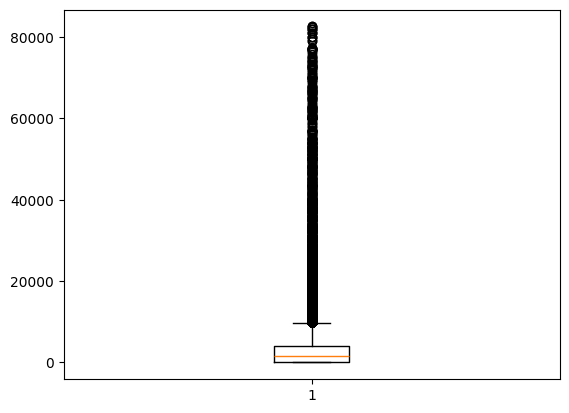

In [ ]:
plt.boxplot(credit_risk_data["PAY_AMT6_NEW"])

#Var14 AGE Cleaning

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
57     122
58     122
59      83
21      67
60      67
61      56
62      44
64      31
63      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
75       3
71       3
72       3
79       1
74       1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='AGE'>

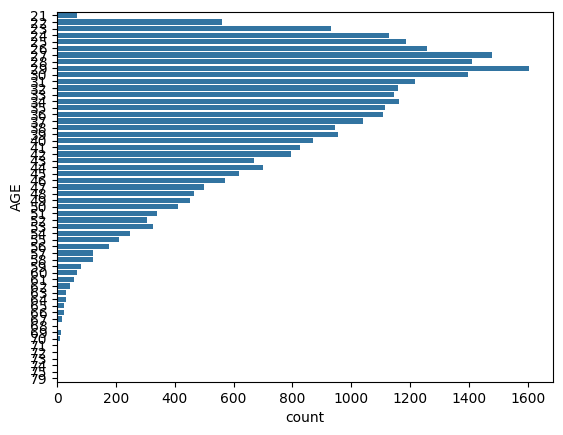

In [ ]:
print(credit_risk_data['AGE'].value_counts())
sns.countplot(y="AGE",  data=credit_risk_data)

In [ ]:
age_bool_temp=credit_risk_data['AGE']>60
credit_risk_data['AGE_NEW']=credit_risk_data['AGE']
credit_risk_data['AGE_NEW'][age_bool_temp]=credit_risk_data['AGE'].median()

<ipython-input-101-0b0e6d1577ef>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  credit_risk_data['AGE_NEW'][age_bool_temp]=credit_risk_data['AGE'].median()
<ipython-input-101-0b0e6d1577ef>:3: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
# percentile distribution for new variable
age_percentiles1=credit_risk_data['AGE_NEW'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
round(age_percentiles1,2)

,AGE_NEW
0.10,25.0
0.20,27.0
0.30,29.0
0.40,31.0
0.50,34.0
0.60,36.0
0.70,39.0
0.80,43.0
0.90,48.0
0.91,49.0


In [ ]:
credit_risk_data


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,EDUCATION_NEW,MARRIAGE_NEW,PAY_0_NEW,PAY_2_NEW,PAY_3_NEW,PAY_4_NEW,PAY_5_NEW,PAY_6_NEW,LIMIT_BAL_NEW,BILL_AMT1_NEW,BILL_AMT2_NEW,BILL_AMT3_NEW,BILL_AMT4_NEW,BILL_AMT5_NEW,BILL_AMT6_NEW,PAY_AMT1_NEW,PAY_AMT2_NEW,PAY_AMT3_NEW,PAY_AMT4_NEW,PAY_AMT5_NEW,PAY_AMT6_NEW,AGE_NEW
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2,1,2,2,-1,-1,2,-1,20000.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,24
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2,2,-1,2,-1,-1,-1,2,120000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,26
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,2,2,-1,-1,-1,-1,-1,-1,90000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,34
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2,1,-1,-1,-1,-1,-1,-1,50000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,37
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,2,1,-1,-1,-1,-1,-1,-1,50000.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,3,1,-1,-1,-1,-1,-1,-1,220000.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,39
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,3,2,-1,-1,-1,-1,-1,-1,150000.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,43
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,2,2,4,3,2,-1,-1,-1,30000.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,37
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,3,1,1,-1,-1,-1,-1,-1,80000.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,2100.0,3409.0,1178.0,1926.0,52964.0,1804.0,41


#DROPPING OLD VARIBALES

In [ ]:
Credit_risk_data_v1 = credit_risk_data.drop(['ID', 'LIMIT_BAL', 'EDUCATION','MARRIAGE', 'AGE', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'
                                            ,'BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
                                             'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)

In [ ]:
order = ['LIMIT_BAL_NEW', 'SEX','EDUCATION_NEW', 'MARRIAGE_NEW', 'AGE_NEW','PAY_0_NEW','PAY_2_NEW', 'PAY_3_NEW', 'PAY_4_NEW', 'PAY_5_NEW', 'PAY_6_NEW', 'BILL_AMT1_NEW','BILL_AMT2_NEW','BILL_AMT3_NEW', 'BILL_AMT4_NEW','BILL_AMT5_NEW', 'BILL_AMT6_NEW', 'PAY_AMT1_NEW', 'PAY_AMT2_NEW', 'PAY_AMT3_NEW', 'PAY_AMT4_NEW', 'PAY_AMT5_NEW', 'PAY_AMT6_NEW','default.payment.next.month']
Credit_risk_data_v1 = Credit_risk_data_v1[order]
Credit_risk_data_v1

,LIMIT_BAL_NEW,SEX,EDUCATION_NEW,MARRIAGE_NEW,AGE_NEW,PAY_0_NEW,PAY_2_NEW,PAY_3_NEW,PAY_4_NEW,PAY_5_NEW,PAY_6_NEW,BILL_AMT1_NEW,BILL_AMT2_NEW,BILL_AMT3_NEW,BILL_AMT4_NEW,BILL_AMT5_NEW,BILL_AMT6_NEW,PAY_AMT1_NEW,PAY_AMT2_NEW,PAY_AMT3_NEW,PAY_AMT4_NEW,PAY_AMT5_NEW,PAY_AMT6_NEW,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,2,-1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,-1,-1,-1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,-1,-1,-1,-1,-1,-1,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,-1,-1,-1,-1,-1,-1,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,-1,-1,-1,-1,-1,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,-1,-1,-1,-1,-1,-1,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,-1,-1,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,-1,-1,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,-1,-1,-1,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,2100.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Model Building
Select the right model, Include Feature Engineering, Perform Model Validation, Multiple models and performance comparison


# Logictic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression()
logistic.fit(Credit_risk_data_v1[['LIMIT_BAL_NEW']+['SEX']+['EDUCATION_NEW']+ ['MARRIAGE_NEW']+['AGE_NEW']+['PAY_0_NEW']+['PAY_2_NEW']+['PAY_3_NEW']+['PAY_4_NEW']+['PAY_5_NEW']+['PAY_6_NEW']+['BILL_AMT1_NEW']+['BILL_AMT2_NEW']+['BILL_AMT3_NEW']+['BILL_AMT4_NEW']+['BILL_AMT5_NEW']+['BILL_AMT6_NEW']+['PAY_AMT1_NEW']+['PAY_AMT2_NEW']+['PAY_AMT3_NEW']+['PAY_AMT4_NEW']+ ['PAY_AMT5_NEW']+['PAY_AMT6_NEW']],Credit_risk_data_v1[['default.payment.next.month']])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

Intercept [-4.24705893e-07]
Coefficients [[-4.53638964e-06 -7.47373253e-07 -9.33646362e-07 -8.05648717e-07
  -1.28687040e-05  1.80298721e-06  1.48097252e-06  1.19887835e-06
   1.11367489e-06  1.05326592e-06  1.19110544e-06 -3.86453815e-06
   5.02707565e-07  6.15738558e-07  2.55234888e-06  5.08377461e-07
   3.63280704e-06 -3.92718699e-05 -4.93309278e-05 -2.88803044e-05
  -1.77063950e-05 -2.13620299e-05 -1.18713442e-05]]


# Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
predict=logistic.predict(Credit_risk_data_v1[['LIMIT_BAL_NEW']+['SEX']+['EDUCATION_NEW']+ ['MARRIAGE_NEW']+['AGE_NEW']+['PAY_0_NEW']+['PAY_2_NEW']+['PAY_3_NEW']+['PAY_4_NEW']+['PAY_5_NEW']+['PAY_6_NEW']+['BILL_AMT1_NEW']+['BILL_AMT2_NEW']+['BILL_AMT3_NEW']+['BILL_AMT4_NEW']+['BILL_AMT5_NEW']+['BILL_AMT6_NEW']+['PAY_AMT1_NEW']+['PAY_AMT2_NEW']+['PAY_AMT3_NEW']+['PAY_AMT4_NEW']+ ['PAY_AMT5_NEW']+['PAY_AMT6_NEW']])
predict

cm = confusion_matrix(Credit_risk_data_v1[['default.payment.next.month']],predict)
print(cm)

[[23363     1]
 [ 6635     1]]


In [ ]:
print("col sums", sum(cm))
total=sum(sum(cm))
print("Total", total)

col sums [29998     2]
Total 30000


In [ ]:
accuracy=(cm[0,0]+cm[1,1])/total
accuracy

np.float64(0.7788)

#Multicollinearity

In [ ]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
vif_cal(input_data=Credit_risk_data_v1, dependent_col="default.payment.next.month")

LIMIT_BAL_NEW  VIF =  1.36
SEX  VIF =  1.02
EDUCATION_NEW  VIF =  1.12
MARRIAGE_NEW  VIF =  1.22
AGE_NEW  VIF =  1.27
PAY_0_NEW  VIF =  2.92
PAY_2_NEW  VIF =  3.62
PAY_3_NEW  VIF =  2.86
PAY_4_NEW  VIF =  3.33
PAY_5_NEW  VIF =  2.74
PAY_6_NEW  VIF =  1.32
BILL_AMT1_NEW  VIF =  7.16
BILL_AMT2_NEW  VIF =  11.53
BILL_AMT3_NEW  VIF =  9.3
BILL_AMT4_NEW  VIF =  8.23
BILL_AMT5_NEW  VIF =  9.68
BILL_AMT6_NEW  VIF =  6.71
PAY_AMT1_NEW  VIF =  1.37
PAY_AMT2_NEW  VIF =  1.37
PAY_AMT3_NEW  VIF =  1.32
PAY_AMT4_NEW  VIF =  1.32
PAY_AMT5_NEW  VIF =  1.33
PAY_AMT6_NEW  VIF =  1.21


BILL_AMT VARIBALE HAS VIF GREATER THAN 5 SO WE HAVE TO DROP THEM SEQUENTIALLY

In [ ]:
# Drop the variable with highest VIF
vif_cal(input_data=Credit_risk_data_v1.drop("BILL_AMT2_NEW", axis=1), dependent_col="default.payment.next.month")

LIMIT_BAL_NEW  VIF =  1.36
SEX  VIF =  1.02
EDUCATION_NEW  VIF =  1.12
MARRIAGE_NEW  VIF =  1.22
AGE_NEW  VIF =  1.27
PAY_0_NEW  VIF =  2.92
PAY_2_NEW  VIF =  3.62
PAY_3_NEW  VIF =  2.86
PAY_4_NEW  VIF =  3.33
PAY_5_NEW  VIF =  2.74
PAY_6_NEW  VIF =  1.32
BILL_AMT1_NEW  VIF =  4.16
BILL_AMT3_NEW  VIF =  7.16
BILL_AMT4_NEW  VIF =  8.22
BILL_AMT5_NEW  VIF =  9.67
BILL_AMT6_NEW  VIF =  6.7
PAY_AMT1_NEW  VIF =  1.33
PAY_AMT2_NEW  VIF =  1.36
PAY_AMT3_NEW  VIF =  1.31
PAY_AMT4_NEW  VIF =  1.32
PAY_AMT5_NEW  VIF =  1.33
PAY_AMT6_NEW  VIF =  1.21


In [ ]:
vif_cal(input_data=Credit_risk_data_v1.drop(["BILL_AMT2_NEW","BILL_AMT5_NEW"], axis=1), dependent_col="default.payment.next.month")

LIMIT_BAL_NEW  VIF =  1.36
SEX  VIF =  1.02
EDUCATION_NEW  VIF =  1.12
MARRIAGE_NEW  VIF =  1.22
AGE_NEW  VIF =  1.27
PAY_0_NEW  VIF =  2.92
PAY_2_NEW  VIF =  3.62
PAY_3_NEW  VIF =  2.86
PAY_4_NEW  VIF =  3.33
PAY_5_NEW  VIF =  2.74
PAY_6_NEW  VIF =  1.32
BILL_AMT1_NEW  VIF =  4.15
BILL_AMT3_NEW  VIF =  7.13
BILL_AMT4_NEW  VIF =  6.86
BILL_AMT6_NEW  VIF =  4.0
PAY_AMT1_NEW  VIF =  1.33
PAY_AMT2_NEW  VIF =  1.36
PAY_AMT3_NEW  VIF =  1.31
PAY_AMT4_NEW  VIF =  1.28
PAY_AMT5_NEW  VIF =  1.31
PAY_AMT6_NEW  VIF =  1.21


In [ ]:
vif_cal(input_data=Credit_risk_data_v1.drop(["BILL_AMT2_NEW","BILL_AMT5_NEW","BILL_AMT3_NEW"], axis=1), dependent_col="default.payment.next.month")

LIMIT_BAL_NEW  VIF =  1.36
SEX  VIF =  1.02
EDUCATION_NEW  VIF =  1.12
MARRIAGE_NEW  VIF =  1.22
AGE_NEW  VIF =  1.27
PAY_0_NEW  VIF =  2.92
PAY_2_NEW  VIF =  3.62
PAY_3_NEW  VIF =  2.86
PAY_4_NEW  VIF =  3.32
PAY_5_NEW  VIF =  2.74
PAY_6_NEW  VIF =  1.32
BILL_AMT1_NEW  VIF =  2.94
BILL_AMT4_NEW  VIF =  5.08
BILL_AMT6_NEW  VIF =  3.98
PAY_AMT1_NEW  VIF =  1.32
PAY_AMT2_NEW  VIF =  1.33
PAY_AMT3_NEW  VIF =  1.3
PAY_AMT4_NEW  VIF =  1.28
PAY_AMT5_NEW  VIF =  1.31
PAY_AMT6_NEW  VIF =  1.21


In [ ]:
vif_cal(input_data=Credit_risk_data_v1.drop(["BILL_AMT2_NEW","BILL_AMT5_NEW","BILL_AMT3_NEW","BILL_AMT4_NEW"], axis=1), dependent_col="default.payment.next.month")

LIMIT_BAL_NEW  VIF =  1.36
SEX  VIF =  1.02
EDUCATION_NEW  VIF =  1.12
MARRIAGE_NEW  VIF =  1.22
AGE_NEW  VIF =  1.27
PAY_0_NEW  VIF =  2.92
PAY_2_NEW  VIF =  3.62
PAY_3_NEW  VIF =  2.86
PAY_4_NEW  VIF =  3.32
PAY_5_NEW  VIF =  2.73
PAY_6_NEW  VIF =  1.32
BILL_AMT1_NEW  VIF =  2.27
BILL_AMT6_NEW  VIF =  2.35
PAY_AMT1_NEW  VIF =  1.32
PAY_AMT2_NEW  VIF =  1.32
PAY_AMT3_NEW  VIF =  1.27
PAY_AMT4_NEW  VIF =  1.27
PAY_AMT5_NEW  VIF =  1.3
PAY_AMT6_NEW  VIF =  1.21


In [ ]:
credit_risk_data_v2 = Credit_risk_data_v1.drop(["BILL_AMT2_NEW","BILL_AMT5_NEW","BILL_AMT3_NEW","BILL_AMT4_NEW"], axis=1)
credit_risk_data_v2

,LIMIT_BAL_NEW,SEX,EDUCATION_NEW,MARRIAGE_NEW,AGE_NEW,PAY_0_NEW,PAY_2_NEW,PAY_3_NEW,PAY_4_NEW,PAY_5_NEW,PAY_6_NEW,BILL_AMT1_NEW,BILL_AMT6_NEW,PAY_AMT1_NEW,PAY_AMT2_NEW,PAY_AMT3_NEW,PAY_AMT4_NEW,PAY_AMT5_NEW,PAY_AMT6_NEW,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,2,-1,3913.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,-1,-1,-1,2,2682.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,-1,-1,-1,-1,-1,-1,29239.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,-1,-1,-1,-1,-1,-1,46990.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,-1,-1,-1,-1,-1,8617.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,-1,-1,-1,-1,-1,-1,188948.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,-1,-1,1683.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,-1,-1,3565.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,-1,-1,-1,-1,-1645.0,48944.0,2100.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Individual Impact of Variables (P Value)

In [ ]:
import statsmodels.api as sm
m1=sm.Logit(credit_risk_data_v2['default.payment.next.month'],credit_risk_data_v2[["LIMIT_BAL_NEW"]+['SEX']+['EDUCATION_NEW']+['MARRIAGE_NEW']+['AGE_NEW']+['PAY_0_NEW']+['PAY_2_NEW']+['PAY_3_NEW']+['PAY_4_NEW']+['PAY_5_NEW']+['PAY_6_NEW']+['BILL_AMT1_NEW']+['BILL_AMT6_NEW']+['PAY_AMT1_NEW']+['PAY_AMT2_NEW']+['PAY_AMT3_NEW']+['PAY_AMT4_NEW']+['PAY_AMT5_NEW']+['PAY_AMT6_NEW']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.457763
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.457763
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29981
Method:                                   MLE   Df Model:                           18
Date:                        Mon, 14 Apr 2025   Pseudo R-squ.:                  0.1337
Time:                                08:50:43   Log-Likelihood:                -13733.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
------------------

P value of PAY2, PAY3 and PAY4 is greater than 0.05 so we drop that varibales

In [ ]:
m1=sm.Logit(credit_risk_data_v2['default.payment.next.month'],credit_risk_data_v2[["LIMIT_BAL_NEW"]+['SEX']+['EDUCATION_NEW']+['MARRIAGE_NEW']+['AGE_NEW']+['PAY_0_NEW']+['PAY_5_NEW']+['PAY_6_NEW']+['BILL_AMT1_NEW']+['BILL_AMT6_NEW']+['PAY_AMT1_NEW']+['PAY_AMT2_NEW']+['PAY_AMT3_NEW']+['PAY_AMT4_NEW']+['PAY_AMT5_NEW']+['PAY_AMT6_NEW']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.457933
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.457933
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29984
Method:                                   MLE   Df Model:                           15
Date:                        Mon, 14 Apr 2025   Pseudo R-squ.:                  0.1334
Time:                                08:50:43   Log-Likelihood:                -13738.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
------------------

In [ ]:
credit_risk_data_v2 = credit_risk_data_v2.drop(["PAY_2_NEW","PAY_3_NEW","PAY_4_NEW"], axis=1)
credit_risk_data_v2

,LIMIT_BAL_NEW,SEX,EDUCATION_NEW,MARRIAGE_NEW,AGE_NEW,PAY_0_NEW,PAY_5_NEW,PAY_6_NEW,BILL_AMT1_NEW,BILL_AMT6_NEW,PAY_AMT1_NEW,PAY_AMT2_NEW,PAY_AMT3_NEW,PAY_AMT4_NEW,PAY_AMT5_NEW,PAY_AMT6_NEW,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,3913.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,-1,2,2682.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,-1,-1,-1,29239.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,-1,-1,-1,46990.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,-1,-1,8617.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,-1,-1,-1,188948.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,1683.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,-1,-1,3565.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,-1,-1645.0,48944.0,2100.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Rank Ordering of the impactful variables

In [ ]:
m1=sm.Logit(credit_risk_data_v2['default.payment.next.month'],credit_risk_data_v2[["LIMIT_BAL_NEW"]+['SEX']+['EDUCATION_NEW']+['MARRIAGE_NEW']+['AGE_NEW']+['PAY_0_NEW']+['PAY_5_NEW']+['PAY_6_NEW']+['BILL_AMT1_NEW']+['BILL_AMT6_NEW']+['PAY_AMT1_NEW']+['PAY_AMT2_NEW']+['PAY_AMT3_NEW']+['PAY_AMT4_NEW']+['PAY_AMT5_NEW']+['PAY_AMT6_NEW']])
result = m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.457933
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.457933
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29984
Method:                                   MLE   Df Model:                           15
Date:                        Mon, 14 Apr 2025   Pseudo R-squ.:                  0.1334
Time:                                09:00:23   Log-Likelihood:                -13738.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Extract coefficients and p-values from the summary
params = result.params
pvalues = result.pvalues

# Calculate Wald Chi-Square statistic (z^2)
wald_chi2 = params ** 2 / result.bse ** 2


# Create a DataFrame for ranking
impact_df = pd.DataFrame({'Variable': wald_chi2.index,
                          'Coefficient': params,
                          'Wald Chi-Square': wald_chi2,
                          'P-value': pvalues})

# Sort by Wald Chi-Square in descending order
impact_df = impact_df.sort_values(by='Wald Chi-Square', ascending=False)

# Display the ranked variables
impact_df



,Variable,Coefficient,Wald Chi-Square,P-value
PAY_0_NEW,PAY_0_NEW,0.477005,1504.364014,0.000000e+00
PAY_6_NEW,PAY_6_NEW,0.315282,428.688373,3.135917e-95
LIMIT_BAL_NEW,LIMIT_BAL_NEW,-0.000003,284.180645,9.216898e-64
MARRIAGE_NEW,MARRIAGE_NEW,-0.187960,66.303481,3.865754e-16
PAY_AMT2_NEW,PAY_AMT2_NEW,-0.000023,45.523907,1.507871e-11
SEX,SEX,-0.175970,42.173086,8.354188e-11
PAY_AMT3_NEW,PAY_AMT3_NEW,-0.000016,23.650430,1.155201e-06
PAY_AMT4_NEW,PAY_AMT4_NEW,-0.000015,21.107617,4.341988e-06
BILL_AMT1_NEW,BILL_AMT1_NEW,0.000002,17.281897,3.222423e-05
BILL_AMT6_NEW,BILL_AMT6_NEW,0.000002,15.315072,9.098765e-05


#Model Validation after dropping variables

In [ ]:
credit_risk_data_v2.columns

Index(['LIMIT_BAL_NEW', 'SEX', 'EDUCATION_NEW', 'MARRIAGE_NEW', 'AGE_NEW',
       'PAY_0_NEW', 'PAY_5_NEW', 'PAY_6_NEW', 'BILL_AMT1_NEW', 'BILL_AMT6_NEW',
       'PAY_AMT1_NEW', 'PAY_AMT2_NEW', 'PAY_AMT3_NEW', 'PAY_AMT4_NEW',
       'PAY_AMT5_NEW', 'PAY_AMT6_NEW', 'default.payment.next.month'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic1= LogisticRegression()
logistic1.fit(credit_risk_data_v2[['LIMIT_BAL_NEW']+['SEX']+['EDUCATION_NEW']+ ['MARRIAGE_NEW']+['AGE_NEW']+['PAY_0_NEW']+['PAY_5_NEW']+['PAY_6_NEW']+['BILL_AMT1_NEW']+['BILL_AMT6_NEW']+['PAY_AMT1_NEW']+['PAY_AMT2_NEW']+['PAY_AMT3_NEW']+['PAY_AMT4_NEW']+ ['PAY_AMT5_NEW']+['PAY_AMT6_NEW']],Credit_risk_data_v1[['default.payment.next.month']])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict1=logistic1.predict(credit_risk_data_v2[['LIMIT_BAL_NEW']+['SEX']+['EDUCATION_NEW']+ ['MARRIAGE_NEW']+['AGE_NEW']+['PAY_0_NEW']+['PAY_5_NEW']+['PAY_6_NEW']+['BILL_AMT1_NEW']+['BILL_AMT6_NEW']+['PAY_AMT1_NEW']+['PAY_AMT2_NEW']+['PAY_AMT3_NEW']+['PAY_AMT4_NEW']+ ['PAY_AMT5_NEW']+['PAY_AMT6_NEW']])
predict1

cm1 = confusion_matrix(credit_risk_data_v2[['default.payment.next.month']],predict1)
print(cm1)

[[23363     1]
 [ 6636     0]]


In [ ]:
print("col sums", sum(cm1))
total1=sum(sum(cm1))
print("Total", total1)

col sums [29999     1]
Total 30000


In [ ]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
accuracy1

np.float64(0.7787666666666667)

# Model  Deployment
## Optional step